[YYYYMMDD]

# 2. Model 2

After Preparation ready. Build and train the model in here. (Describe the model)

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
import pmdarima
import sys
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
from ramal import eval_model

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_1'+'/'
PATH_UDF = config['path']['udf']

In [5]:
%matplotlib inline

## Get Data

In [6]:
ts2 = joblib.load(PATH_MODEL+'ramal_1-92.pkl')

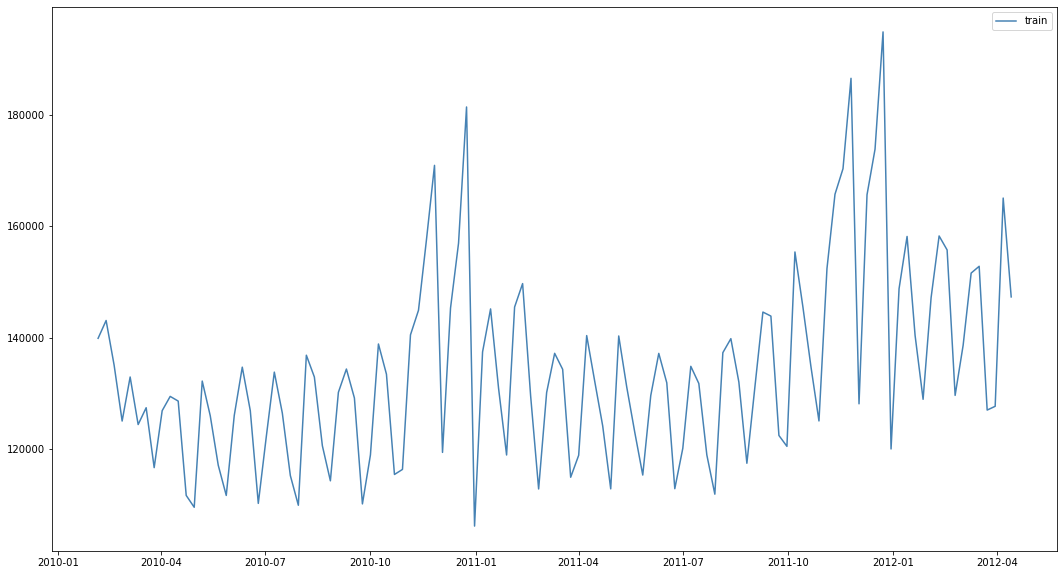

In [7]:
ts2.plot()

## Model 1

In [8]:
arima_model1 = pmdarima.arima.auto_arima(ts2.data, d = 1, max_d = 2
                         ,start_p = 1, max_p = 7
                         ,start_q = 1, max_q = 7
                         # ,D = 1, max_D = 3
                         # ,start_P = 0, max_P = 2
                         # ,start_Q = 0, max_Q = 2
                         # ,m = 4
                         ,seasonal = False
                         ,startionary = False
                         ,stepwise = False
                         ,trace = True
                         ,n_jobs = 5
                         ,random = True
                         ,n_fits = 30)


c:\Users\amoza\anaconda3\envs\droid1\lib\site-packages\pmdarima\arima\_auto_solvers.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gen = random_state.permutation(list(gen))[:n_fits]



Best model:  ARIMA(0,1,5)(0,0,0)[0] intercept
Total fit time: 6.509 seconds


In [9]:
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 1, 5)   Log Likelihood               -1257.102
Date:                Wed, 05 Oct 2022   AIC                           2528.204
Time:                        20:58:58   BIC                           2547.358
Sample:                    02-05-2010   HQIC                          2535.978
                         - 04-13-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    649.3774    546.461      1.188      0.235    -421.666    1720.421
ma.L1         -0.5126      0.077     -6.627      0.000      -0.664      -0.361
ma.L2         -0.2384      0.051     -4.701      0.000      -0.338      -0.139
ma.L3         -0.2151      0.095     -2.255      0.024      -0.402      -0.028
ma.L4          0.5205      0.070      7.481      0.000       0.384       0.657
ma.L5         -0.2334      0.067     -3.483      0.000      -0.365      -0.102
sigma2      2.115e+08      0.001    2.5e+11      0.000    2.11e+08    2.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 9.23
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.16   Skew:                             0.13
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+27. Standard errors may be unstable.
"""

## Eval

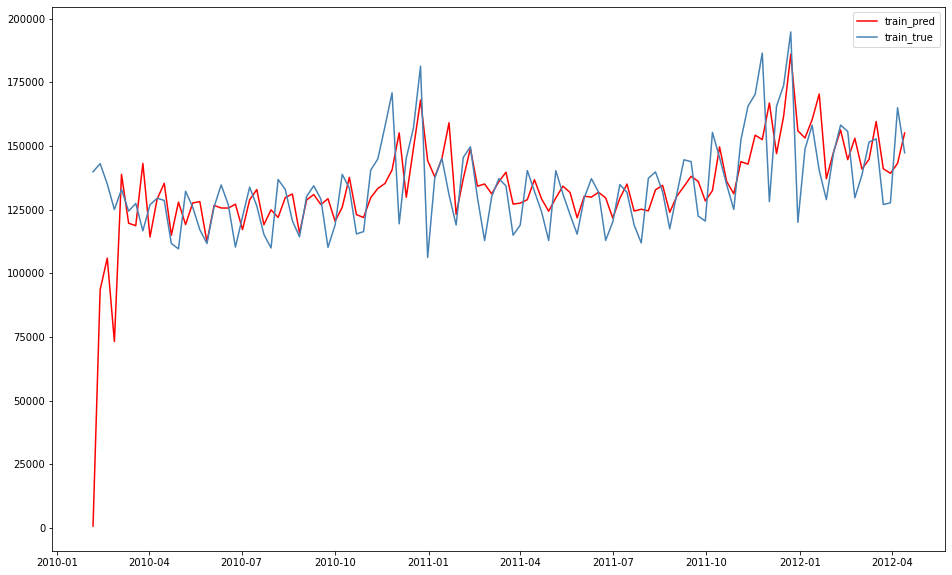

In [10]:
df_data_train = ts2.data
df_train_pred = pd.Series(arima_model1.predict_in_sample(), index = df_data_train.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_train_pred, label='train_pred', color='red')
plt.plot(ts2.data, label='train_true', color='steelblue')
plt.legend()

In [11]:
eval_model(ts2.data_1d(), df_train_pred)

{'MAE': 12026.111284384715,
 'MAPE': 0.09016535485009532,
 'MSE': 397204472.5461527,
 'RMSE': 19929.989276117354,
 'over_est_0': 0.5478260869565217,
 'under_est_0': 0.45217391304347826,
 'R2': -0.33026157662677025}

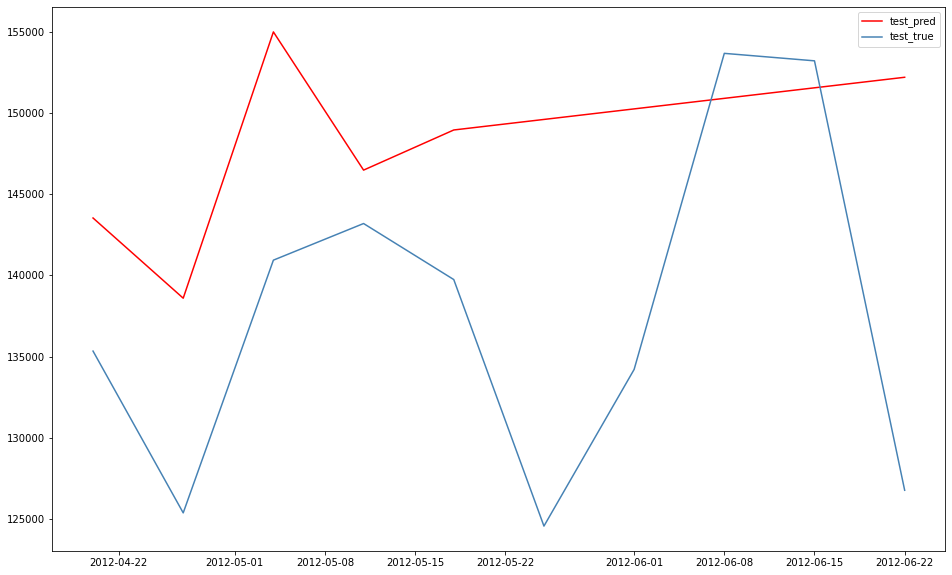

In [12]:
n_test = 10

df_data_test = ts2.data_test[:n_test]
df_test_pred = pd.Series(arima_model1.predict(n_periods=len(df_data_test)), index = df_data_test.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [13]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 11895.84442019736,
 'MAPE': 0.09049928860862669,
 'MSE': 207816530.36419758,
 'RMSE': 14415.84303341978,
 'over_est_0': 0.8,
 'under_est_0': 0.2,
 'R2': -1.0719502242890253}